In [474]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
from openpyxl import load_workbook

sheets = load_workbook(r'sample data - hucoco (2).xlsx', read_only=True).sheetnames
sheets

['fields descrip order_line_d', 'order_line_data', 'Ecommerce Customers']

In [12]:
data = pd.read_excel("sample data - hucoco (2).xlsx", sheet_name = 'Ecommerce Customers')

In [13]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [552]:
data.duplicated().sum()

0

In [127]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [14]:
data.shape

(500, 8)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [352]:
pd.set_option('display.precision', 3)
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000,500.000,500.000,500.000,500.000
mean,33.053,12.052,37.060,3.533,499.314
std,0.993,0.994,1.010,0.999,79.315
min,29.532,8.508,33.914,0.270,256.671
25%,32.342,11.388,36.349,2.930,445.038
50%,33.082,11.983,37.069,3.534,498.888
75%,33.712,12.754,37.716,4.127,549.314
max,36.140,15.127,40.005,6.923,765.518


## Exploratory Data Analysis

In [557]:
cont = data.columns.values[3:]
cont

array(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'], dtype=object)

In [49]:
df_cont = data[cont]
df_cont

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


#### Heatmap shows no correlation between particular variables (except Yearly Amount Spent that is going to be Y variable) - good news for regressing plan!

<AxesSubplot:>

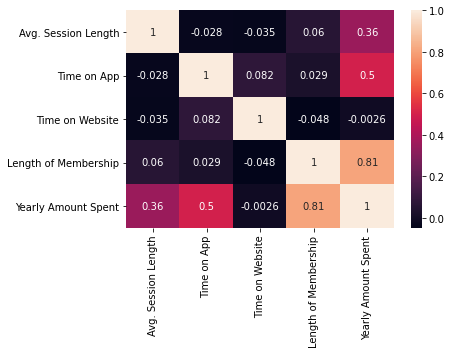

In [53]:
sns.heatmap(df_cont.corr(), annot=True)

#### Correlogram shows no bi- or multimodality of variables' distributions. They are ok to be used in regression modeling.

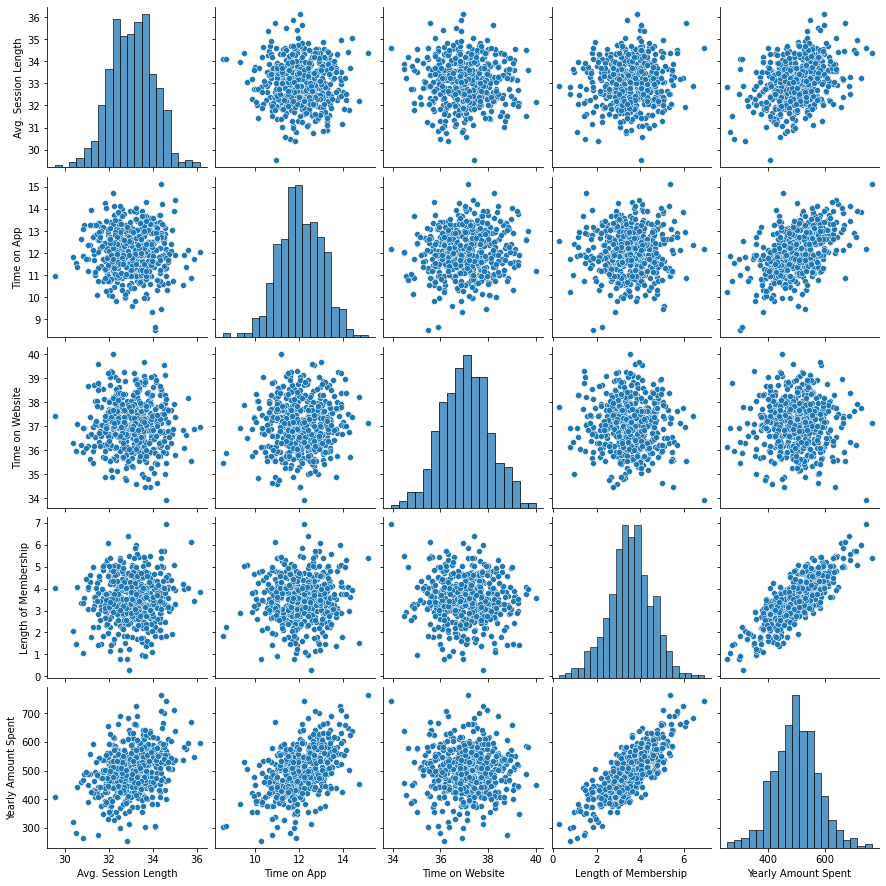

In [549]:
sns.pairplot(data = df_cont)

#### Some extra insights

#### Multidimensional relation between Length of Membership ,Time on App and Spent Money

Text(0.5, 1.0, 'Time on App vs. Spent Money')

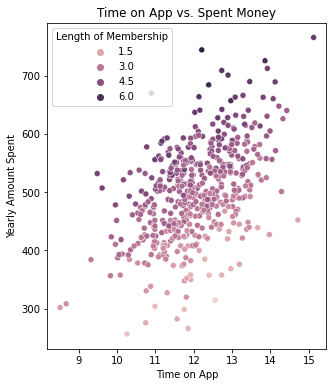

In [63]:
f, ax = plt.subplots(figsize=(5,6)) 
sns.scatterplot(x="Time on App",
                y="Yearly Amount Spent", 
                data = data,
               hue = "Length of Membership")
plt.title("Time on App vs. Spent Money") 

#### Visualisation confirmes multidimensional relation between Length of Membership, Time on App and Yearly Amount Spent 

Text(0.5, 1.0, 'Length of Membership vs. Spent Money')

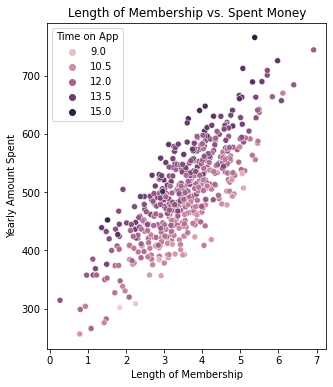

In [561]:
f, ax = plt.subplots(figsize=(5,6)) 
sns.scatterplot(x="Length of Membership",
                y="Yearly Amount Spent", 
                data = data,
               hue = "Time on App")
plt.title("Length of Membership vs. Spent Money") 

#### Time on website doesn't seem correlated with y variable

Text(0.5, 1.0, 'Time on Website vs. Spent Money')

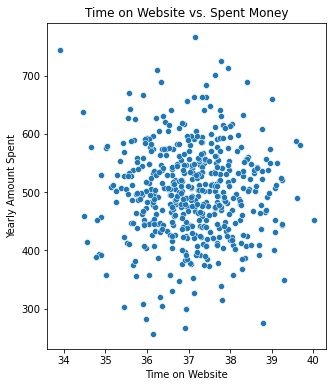

In [560]:
f, ax = plt.subplots(figsize=(5,6)) 
sns.scatterplot(x="Time on Website",
                y="Yearly Amount Spent", 
                data = data)
plt.title("Time on Website vs. Spent Money") 

### Geographical analysis

In [85]:
def state(a):
    if "," in a:
        state = a.split(',')[1]
        return state[1:3]
    else:
        return 'NA'

state(a)

'CA'

In [86]:
df = data.copy()

In [87]:
df['State'] = df['Address'].apply(state)

In [88]:
df['State']

0      MI
1      CA
2      DC
3      OH
4      PR
       ..
495    UT
496    CA
497    TN
498    TX
499    OR
Name: State, Length: 500, dtype: object

In [122]:
df[df['State'] == 'NA']

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146,NA
11,ryanwerner@freeman.biz,Unit 2413 Box 0347\nDPO AA 07580-2652,Tomato,33.879361,11.584783,37.087926,3.713209,522.337405,NA
23,denise22@hernandez-townsend.com,USNS Cardenas\nFPO AA 85439-9449,Silver,32.903251,11.657576,36.772604,3.919302,519.340989,NA
32,briancarlson@page-fleming.com,USCGC Gill\nFPO AA 26496,DarkMagenta,32.175501,13.387492,35.694175,4.343063,588.712606,NA
44,christopher20@gmail.com,USNV Fuller\nFPO AE 32122-5711,Snow,32.044486,13.414935,36.112435,2.258686,448.229829,NA
59,john85@martin-morgan.com,USNV Reese\nFPO AA 73568-0730,Olive,33.754995,12.064157,37.271222,3.970556,547.365141,NA
71,marc54@hotmail.com,Unit 6174 Box 1949\nDPO AP 27478,SandyBrown,34.335896,12.228935,36.157191,4.694322,595.822837,NA
83,shafferdaniel@murphy-harris.info,USCGC Thomas\nFPO AP 43708-2468,Turquoise,32.402371,10.875560,37.781143,1.914090,338.319863,NA
91,audreyjohnson@rosales.com,USCGC Nicholson\nFPO AE 43987-0470,SlateGray,33.616019,13.516284,36.773123,4.125584,611.000025,NA
97,esmith@gmail.com,USS Johnson\nFPO AE 35617-5384,OldLace,34.183821,13.349913,37.827394,4.252006,614.715334,NA


In [98]:
df[df['State'] == 'NA'].shape[0]/df.shape[0] # 6% of NA - quite a lot

0.06

There are 61 states - there must be some duplicates generated by lowcases.

In [438]:
gr_df = df.groupby('State', as_index = False).sum().sort_values(by = 'Yearly Amount Spent', ascending = False)


,State,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
33,NA,990.315,363.057,1109.984,108.734,15146.438
5,Bo,530.394,196.286,598.258,47.748,7546.965
49,SC,428.591,154.072,481.917,53.637,6820.298
10,DE,430.564,154.928,479.212,49.689,6644.981
29,MO,425.652,156.271,486.334,45.633,6402.570
...,...,...,...,...,...,...
14,GU,196.002,70.977,222.866,15.175,2488.208
47,PW,194.022,73.680,223.444,13.997,2479.894
7,CO,161.754,59.358,184.734,17.289,2364.327
57,WA,132.543,50.202,148.047,14.923,2144.472


Text(0.5, 1.0, 'What region spends the most? Sum of spendings')

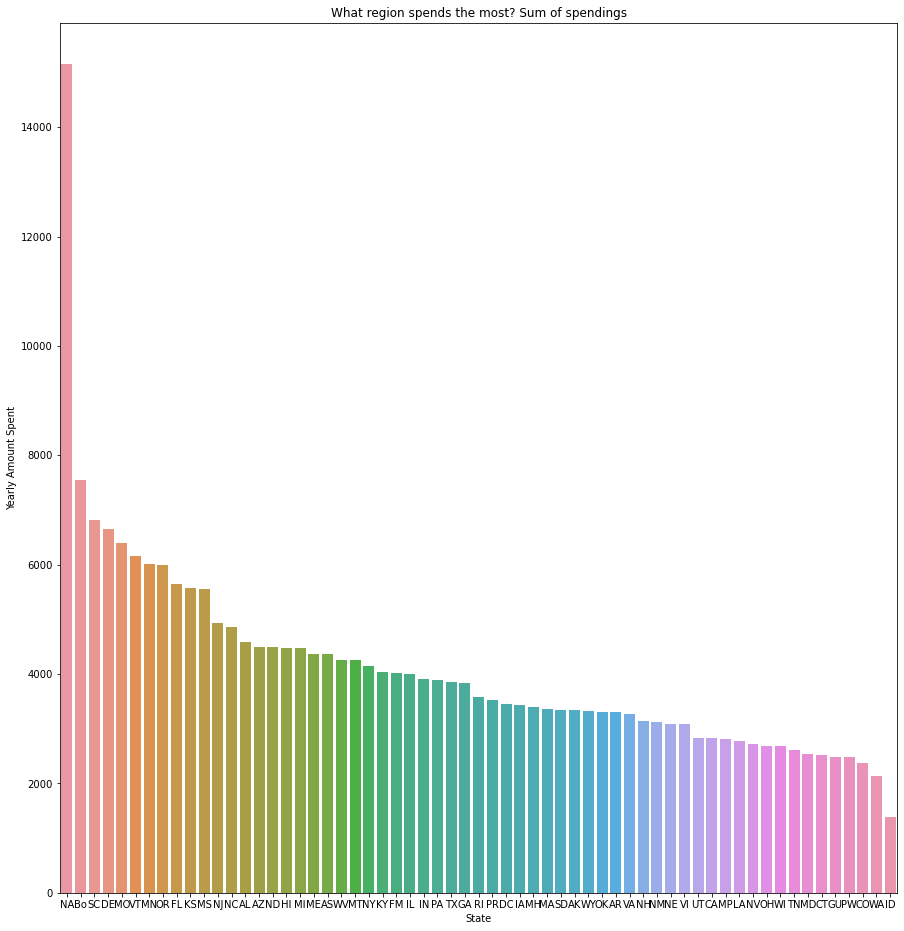

In [439]:
f, ax = plt.subplots(figsize=(15,16)) 
sns.barplot(data = gr_df, x = 'State', y = 'Yearly Amount Spent')
ax.set_title('What region spends the most? Sum of spendings')

The second mostly spending group is 'Bo' what is also a Box. Can these two groups be treated as one?

In [551]:
# group by Team, get mean, min, and max value of Age for each value of Team.
grouped_single = df.groupby('State').mean().reset_index()

<AxesSubplot:xlabel='State', ylabel='Yearly Amount Spent'>

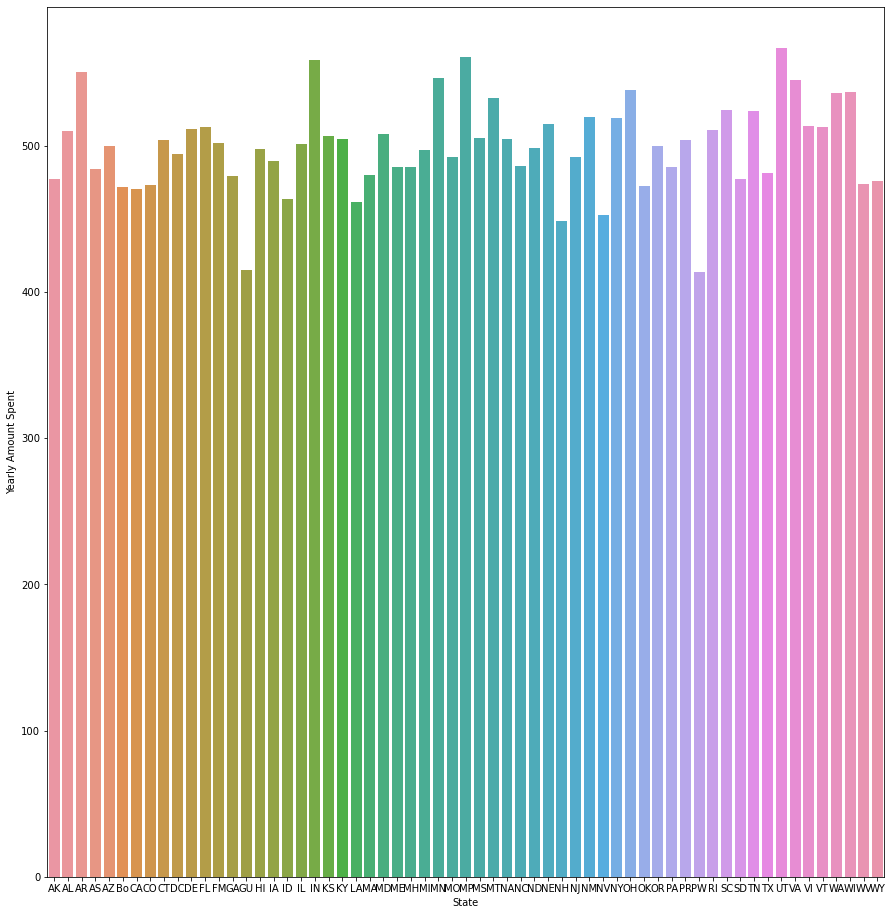

In [556]:
f, ax = plt.subplots(figsize=(15,16)) 
sns.barplot(data = grouped_single, x = 'State', y = 'Yearly Amount Spent')


### Findings:<BR>
1. Summing the spendings by region reveals the leader is NA - no state attached. These customers spend the most and also buy the most often.
2. The average Yearly Amounts Spend are less different between regions

####  Additional investigetion: what are these secret non states?

In [411]:
#states is the new data frame taken from wikipedia
states = pd.read_csv('states.csv')
states = pd.DataFrame(states, columns = ["State"])

In [431]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     50 non-null     object
 1   is_state  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [426]:
states['is_state'] = 1

In [440]:
gr_df = pd.DataFrame(gr_df)

In [441]:
gr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 33 to 17
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 61 non-null     object 
 1   Avg. Session Length   61 non-null     float64
 2   Time on App           61 non-null     float64
 3   Time on Website       61 non-null     float64
 4   Length of Membership  61 non-null     float64
 5   Yearly Amount Spent   61 non-null     float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB


In [442]:
#Merging will show what values do not correspond with States
no_states = pd.merge(states, gr_df, how='outer')
no_states[no_states['is_state'] != 1]

,State,is_state,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
50,NA,NaN,990.315,363.057,1109.984,108.734,15146.438
51,Bo,NaN,530.394,196.286,598.258,47.748,7546.965
52,AS,NaN,299.718,105.776,332.983,30.827,4359.208
53,FM,NaN,269.455,95.796,298.023,26.370,4012.252
54,PR,NaN,229.350,85.551,263.641,25.600,3526.632
55,DC,NaN,232.199,82.621,259.381,25.906,3459.912
56,MH,NaN,228.092,84.420,265.373,24.337,3396.446
57,VI,NaN,198.412,75.382,223.083,20.895,3080.825
58,MP,NaN,165.383,62.499,185.292,20.663,2804.832
59,GU,NaN,196.002,70.977,222.866,15.175,2488.208


#### Joykiller.. I'm guessing the non_states data must be some fake addresses created for this dataset (trial of confirmation by googling)

### Mailing host analysis

In [148]:
def mail(a):
    if "@" in a:
        state = a.split('@')[1]
        return state[0:]
    else:
        return 'NA'


In [149]:
df['Server'] = df['Email'].apply(mail)

In [152]:
df['Server'].unique()

array(['fernandez.com', 'hotmail.com', 'yahoo.com', 'gmail.com',
       'davidson-herman.com', 'lucas.biz', 'walter-martinez.com',
       'lin.biz', 'peterson.com', 'freeman.biz', 'anderson.com',
       'hale-bauer.biz', 'love-west.net', 'hernandez-townsend.com',
       'mcconnell.com', 'schaefer-carr.net', 'martinez.info',
       'page-fleming.com', 'lee-wilson.com', 'bailey-gordon.net',
       'hill-leach.info', 'little.org', 'elliott.com', 'dorsey.net',
       'chung.com', 'garcia-nelson.biz', 'maldonado-gonzalez.net',
       'west.info', 'mcgee.com', 'fowler.info', 'martin-morgan.com',
       'ryan.biz', 'diaz.org', 'contreras.info', 'burgess.com',
       'anthony.com', 'hicks-smith.com', 'peterson-yates.com',
       'ferguson.info', 'richards.com', 'saunders.info', 'ramos.com',
       'murphy-harris.info', 'boyer-pratt.com', 'jones.info',
       'wagner-thomas.com', 'briggs.com', 'rosales.com', 'davis.com',
       'ryan.info', 'munoz.com', 'mcdonald-smith.biz',
       'sanchez-vel

In [550]:
gr_df_serv = df.groupby('Server', as_index = False).sum().sort_values(by = 'Yearly Amount Spent', ascending = False)


In [233]:
def topmail(c):
    if c in ["hotmail.com", 'gmail.com', 'yahoo.com']:
        return c
    else:
        return "other"

In [254]:
df['Server_plain'] = df['Server'].apply(topmail)

### Findings: No evidence that hosting information may give any benefit. There is no confirmation that 3 the most popular mail hosts collect the most frequent buyers

In [255]:
temp = df.groupby("Server_plain", as_index = False).mean().sort_values(by = 'Yearly Amount Spent', ascending = False)
temp

,Server_plain,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,hotmail.com,33.159052,12.216000,37.126817,3.585883,512.074440
3,yahoo.com,33.149870,11.855526,36.928250,3.718237,504.220061
0,gmail.com,33.063299,11.938840,36.977417,3.531369,495.061090
2,other,32.983449,12.095012,37.106429,3.459775,494.862014


In [259]:
temp = df.groupby("Server_plain", as_index = False).sum().sort_values(by = 'Yearly Amount Spent', ascending = False)
temp

,Server_plain,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
2,other,8245.862173,3023.752980,9276.607281,864.943832,123715.503412
1,hotmail.com,2884.837502,1062.791968,3230.033103,311.971800,44550.476243
0,gmail.com,2876.507002,1038.679038,3217.035322,307.229145,43070.314859
3,yahoo.com,2519.390082,901.019982,2806.547004,282.586001,38320.724616


In [260]:
temp = df.groupby("Server_plain", as_index = False).count().sort_values(by = 'Yearly Amount Spent', ascending = False)
temp

,Server_plain,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State,Server
2,other,250,250,250,250,250,250,250,250,250,250
0,gmail.com,87,87,87,87,87,87,87,87,87,87
1,hotmail.com,87,87,87,87,87,87,87,87,87,87
3,yahoo.com,76,76,76,76,76,76,76,76,76,76


### EDA findings
  
1. Geographical
  1. Summing the spendings by region reveals the leader is NA - no state attached. These customers spend the most and also buy the most often.  
  2. The average Yearly Amounts Spend are less different between regions
2. Mail - No evidence that hosting information may give any benefit. There is no confirmation that 3 the most popular mail hosts collect the most frequent buyers

## Regressing part

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\anton\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

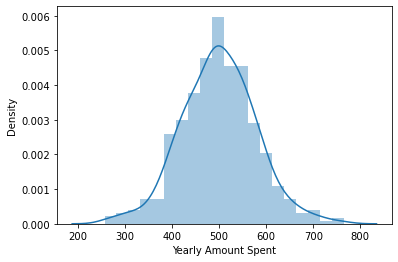

In [404]:
sns.distplot(df['Yearly Amount Spent'])

### Model1

In [480]:
X = df.drop(['Yearly Amount Spent', 'Email', 'Address', 'Avatar', 'State', 'Server', 'Server_plain'], axis = 1)
y = df['Yearly Amount Spent']


In [481]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=123)

In [482]:
lin_reg = LinearRegression()

In [483]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [484]:
Model1 = lin_reg.predict(X_test)

In [485]:
lin_reg.coef_

array([25.53668806, 38.8657142 ,  0.47939571, 61.52388337])

In [486]:
lin_reg.intercept_

-1048.2761649672184

#### Suprisingly high Adj. R-squared 98,4% 
On basis of **Time on Website** variable's `p-value` I'm going to exclude it from regressors list as it turns out the statisticly insignifficant variable 


In [487]:
from statsmodels.api import OLS

X_train["const"] =1
OLS(y_train,X_train).fit().summary()

<ipython-input-487-2c606784dfaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["const"] =1


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     6103.
Date:                 Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                         11:43:58   Log-Likelihood:                -1483.7
No. Observations:                  400   AIC:                             2977.
Df Residuals:                      395   BIC:                             2997.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     25.5367      0.491     52.032      0.000      24.572      26.502
Time on App             38.8657      0.500     77.769      0.000      37.883      39.848
Time on Website          0.4794      0.486      0.986      0.325      -0.477       1.436
Length of Membership    61.5239      0.514    119.610      0.000      60.513      62.535
const                -1048.2762     25.025    -41.889      0.000   -1097.475    -999.077
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.196
Skew:                           0.020   Prob(JB):                        0.907
Kurtosis:                       3.101   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Residuals plot shows data is distributed normally (no bimodality)

C:\Users\anton\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Model 1: Residuals distribution')

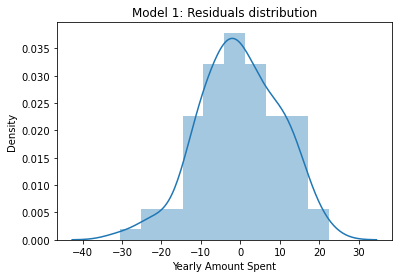

In [506]:
# Residuals analysis
sns.distplot(y_test-Model1)
plt.title('Model 1: Residuals distribution')

### Model 2

In [490]:
X = df.drop(['Yearly Amount Spent', 'Email', 'Address', 'Avatar', 'State', 'Server', 'Server_plain', 'Time on Website'], axis = 1)
y = df['Yearly Amount Spent']

In [491]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=123)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [502]:
Model2 = lin_reg.predict(X_test)

#### Model 2 keeps the Adj Rsquared value (still at very high value) but has higher F-statistics and slightly lower AIC and BIC values

In [503]:
X_train["const"] =1
OLS(y_train,X_train).fit().summary()

<ipython-input-503-e7025600fda6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["const"] =1


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     8138.
Date:                 Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                         11:47:17   Log-Likelihood:                -1484.2
No. Observations:                  400   AIC:                             2976.
Df Residuals:                      396   BIC:                             2992.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     25.5233      0.491     52.027      0.000      24.559      26.488
Time on App             38.9115      0.498     78.201      0.000      37.933      39.890
Length of Membership    61.5235      0.514    119.614      0.000      60.512      62.535
const                -1030.6140     17.467    -59.003      0.000   -1064.954    -996.274
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.134
Skew:                           0.009   Prob(JB):                        0.935
Kurtosis:                       3.088   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Residuals plot shows data is distributed normally (no bimodality)

C:\Users\anton\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Model 2: Residuals distribution')

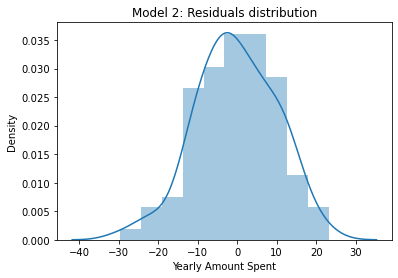

In [507]:
# Residuals analysis
sns.distplot(y_test-Model2)
plt.title('Model 2: Residuals distribution')

### Model Selection

Both models have linearity between actuals and predicted values

Text(0.5, 1.0, 'Model 1')

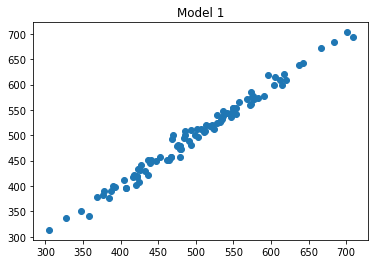

In [509]:
plt.scatter(y_test, Model1)
plt.title('Model 1')

Text(0.5, 1.0, 'Model 2')

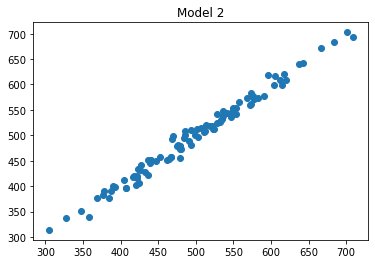

In [510]:
plt.scatter(y_test, Model2)
plt.title('Model 2')

#### Regression evaluation metrics

In [469]:
from sklearn import metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

In [538]:
mae1 = metrics.mean_absolute_error(y_test,Model1)
mae2 = metrics.mean_absolute_error(y_test,Model2)
print('Mean Absolute Error value for Model 1 is {mae1}'.format(mae1 = mae1))
print('Mean Absolute Error value for Model 2 is {mae2}'.format(mae2 = mae2))

Mean Absolute Error value for Model 1 is 8.133367589895084
Mean Absolute Error value for Model 2 is 8.178759568627676


**Mean Squared Error** (MSE) is the mean of the squared errors

In [536]:
mse1 = metrics.mean_squared_error(y_test,Model1)
mse2 = metrics.mean_squared_error(y_test,Model2)
print('Mean Squared Error value for Model 1 is {mse1}'.format(mse1 = mse1))
print('Mean Squared Error value for Model 2 is {mse2}'.format(mse2 = mse2))

Mean Squared Error value for Model 1 is 102.3955232379646
Mean Squared Error value for Model 2 is 102.38541239716689


Mean Squared Error punishes larger errors and this can be useful, eg. 1^2 = 1, 6^2 is 36. This is why MSE behaves differently then MEA in our two models comparison. The bad news is that MSE units are also squared.

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

In [537]:
rmse1 = np.sqrt(metrics.mean_squared_error(y_test,Model1))
rmse2 = np.sqrt(metrics.mean_squared_error(y_test,Model2))
print('Mean Squared Error value for Model 1 is {rmse1}'.format(rmse1 = rmse1))
print('Mean Squared Error value for Model 2 is {rmse2}'.format(rmse2 = rmse2))

Mean Squared Error value for Model 1 is 10.119067310674666
Mean Squared Error value for Model 2 is 10.118567704826948


### Regression  findings

Although both models perform great on test sample my experience shows that in general better models are the simpler ones. That is why **Model 2** is my reccomendation

y = -1030.6140 + 25.5233*Avg. Session Length + 38.9115 * Time on App + 61.5235 * Length of Membership

## Conclusion


### EDA

1. Geographical:
  1. Summing the spendings by region reveals the leader is NA - no state attached. These customers spend the most and also buy the most often.
  2. The average Yearly Amounts Spend are less different between regions
2. Mail - No evidence that hosting information may give any benefit. There is no confirmation that 3 the most popular mail hosts collect the most frequent buyers


### Regression

Final model:
(Yearly Amount Spent) =  -1030.6140 + 25.5233*Avg. Session Length + 38.9115 * Time on App + 61.5235 * Length of Membership

### Mobile vs web page
  
As time on website turns out not to be a statistically significant variable (p-value > 0.05 - per Model 1 summary) my recommentation is to **develop the mobile application**.
Interpreting the model we can say that spending any additional unit of time with mobile application increases the Yearly Amount Spent by coefficient value that is about 39 currency units.
